In [ ]:
# numpy (matrix, sum, mean)

In [ ]:
import numpy as np

arr = np.array([1, 2, 3, 4, 5])

print(arr)
print(type(arr))

[1 2 3 4 5]
<class 'numpy.ndarray'>


In [ ]:
print('select elements by index:',arr[0])
print('slice elements of the array:',arr[1:5])
print('ending point of the array:',arr[4:])
print('ending point of the array:',arr[:4])

select elements by index: 1
slice elements of the array: [2 3 4 5]
ending point of the array: [5]
ending point of the array: [1 2 3 4]


In [ ]:
arr1 = np.array([1, 2, 3])
arr2 = np.array([4, 5, 6])

arr = np.concatenate((arr1, arr2))
print(arr)

[1 2 3 4 5 6]


In [ ]:
arr = np.stack((arr1, arr2), axis=1)
print(arr)

[[1 4]
 [2 5]
 [3 6]]


In [ ]:
arr = np.stack((arr1, arr2), axis=0)
print(arr)

[[1 2 3]
 [4 5 6]]


In [ ]:
np.mean(arr,axis=1)

array([2., 5.])

In [ ]:
np.mean(arr,axis=0)

array([2.5, 3.5, 4.5])

In [ ]:
# pandas ( dataframes, series,describe, info, groupby, pivot, plots)

In [ ]:
# Constructing DataFrame from a dictionary.
import pandas as pd

d = {'col1': [1,5,8, 2], 'col2': [3,3,7, 4]}
df = pd.DataFrame(data=d)
df

,col1,col2
0,1,3
1,5,3
2,8,7
3,2,4


In [ ]:
df = pd.DataFrame({'Animal': ['Dog', 'Dog',
                              'Rat', 'Rat','Rat'],
                   'Max Speed': [380., 370., 24., 26.,25.],
                   'Max Weight': [10., 8.1, .1, .12,.09]})
df

,Animal,Max Speed,Max Weight
0,Dog,380.0,10.00
1,Dog,370.0,8.10
2,Rat,24.0,0.10
3,Rat,26.0,0.12
4,Rat,25.0,0.09


In [ ]:
df.groupby(['Animal']).mean()

,Max Speed,Max Weight
Animal,,
Dog,375.0,9.050000
Rat,25.0,0.103333


In [ ]:
df.value_counts()

Animal  Max Speed  Max Weight
Dog     370.0      8.10          1
        380.0      10.00         1
Rat     24.0       0.10          1
        25.0       0.09          1
        26.0       0.12          1
dtype: int64

In [ ]:
# Aggregate over the rows.

df.agg("mean", axis="rows",numeric_only=True)

Max Speed     165.000
Max Weight      3.682
dtype: float64

In [ ]:
df.agg({'Max Speed' : ['sum', 'min'], 'Max Weight' : ['mean', 'max']})

,Max Speed,Max Weight
sum,825.0,NaN
min,24.0,NaN
mean,NaN,3.682
max,NaN,10.000


In [ ]:
df.quantile(.1)

Max Speed     24.400
Max Weight     0.094
Name: 0.1, dtype: float64

In [ ]:
df.quantile([.1, .5])

,val
0.1,1.5
0.5,3.5


In [ ]:
df = pd.DataFrame({'type': ['one', 'one', 'one', 'two', 'two',
                           'two'],
                   'cat': ['A', 'B', 'C', 'A', 'B', 'C'],
                   'val': [1, 2, 3, 4, 5, 6],
                   'letter': ['x', 'y', 'z', 'q', 'w', 't']})
df

,type,cat,val,letter
0,one,A,1,x
1,one,B,2,y
2,one,C,3,z
3,two,A,4,q
4,two,B,5,w
5,two,C,6,t


In [ ]:
df.pivot(index='type', columns='cat', values='val')

cat,A,B,C
type,,,
one,1,2,3
two,4,5,6


In [ ]:
# seaborn (bar chart, hist,pairplot, density, boxplot, scatter)

In [ ]:
# These examples will use the “tips” dataset, which has a mixture of numeric and categorical variables:
import seaborn as sns

tips = sns.load_dataset("tips")
tips.head()

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4


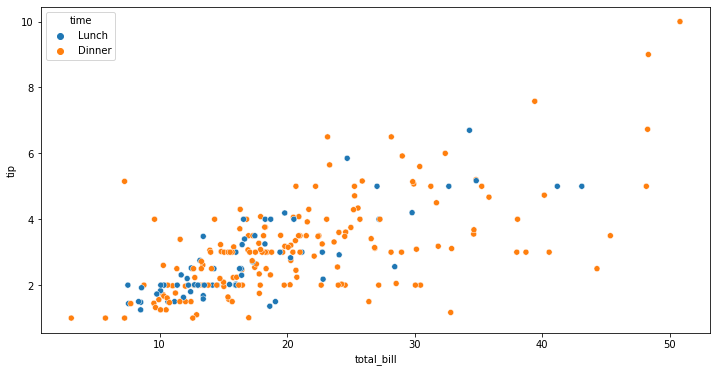

In [ ]:
import matplotlib.pyplot as plt # visualization


f, ax = plt.subplots(figsize=(12, 6))
sns.scatterplot(data=tips, x="total_bill", y="tip", hue="time")

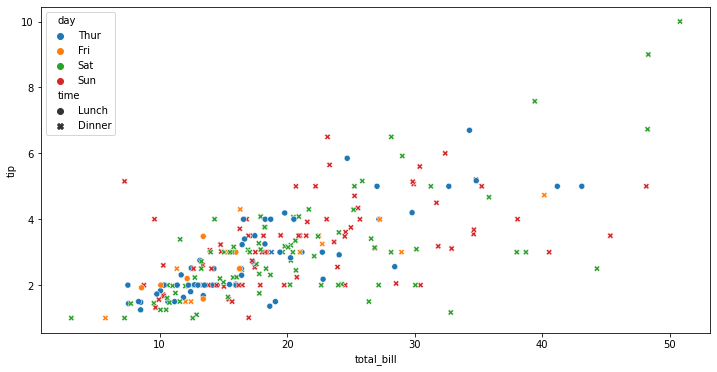

In [ ]:
# Assigning hue and style to different variables will vary colors and markers independently:
f, ax = plt.subplots(figsize=(12, 6))
sns.scatterplot(data=tips, x="total_bill", y="tip", hue="day", style="time")

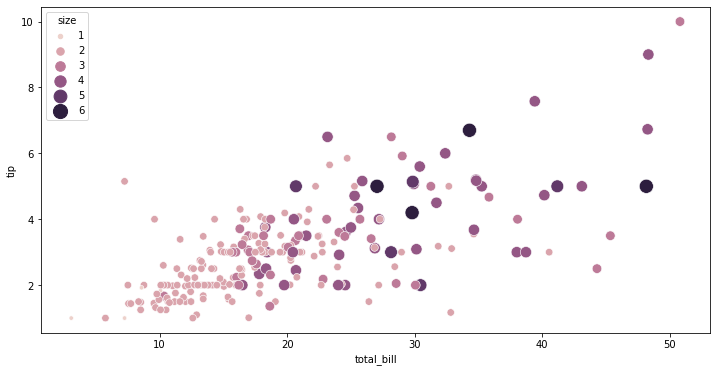

In [ ]:
# A numeric variable can also be assigned to size to apply a semantic mapping to the areas of the points:
# control the range of marker areas with sizes, and set lengend="full" to force every unique value to appear in the legend:
f, ax = plt.subplots(figsize=(12, 6))
sns.scatterplot(
    data=tips, x="total_bill", y="tip", hue="size", size="size",
    sizes=(20, 200), legend="full"
)

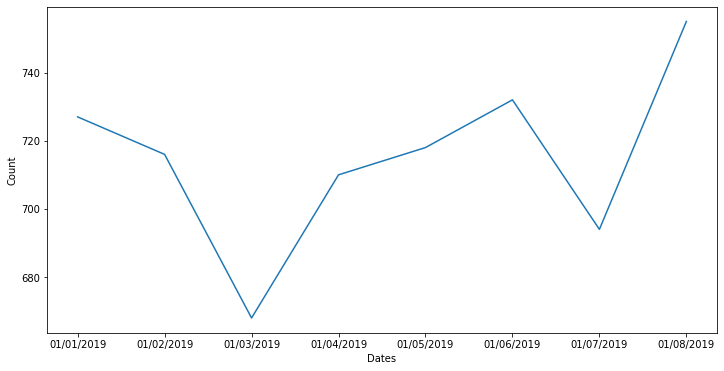

In [ ]:
df = pd.DataFrame({"Dates": ['01/01/2019','01/02/2019','01/03/2019','01/04/2019',
                             '01/05/2019','01/06/2019','01/07/2019','01/08/2019'],
                   "Count": [727,716,668,710,718,732,694,755]})
plt.figure(figsize = (12,6))
sns.lineplot(x = 'Dates', y = 'Count',data = df)

In [ ]:
# Timeseries plot with error bands

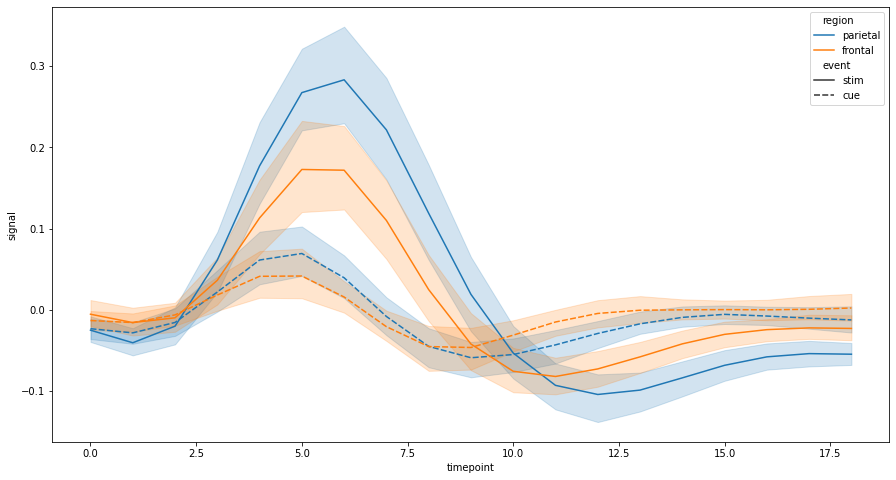

In [ ]:
# Load an example dataset with long-form data
fmri = sns.load_dataset("fmri")
f, ax = plt.subplots(figsize=(15, 8))
# Plot the responses for different events and regions
sns.lineplot(x="timepoint", y="signal",
             hue="region", style="event",
             data=fmri)

In [ ]:
# bar chart

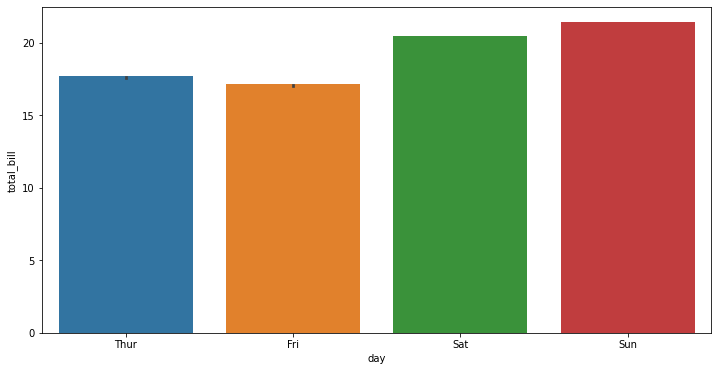

In [ ]:
f, ax = plt.subplots(figsize=(12, 6))
ax = sns.barplot(x="day", y="total_bill", data=tips,ci=.9)

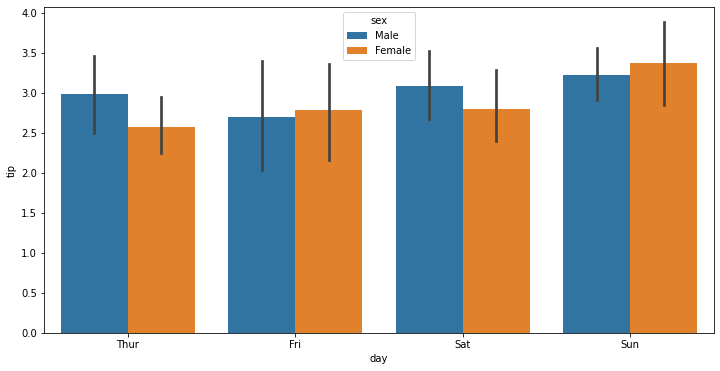

In [ ]:
# Draw a set of vertical bars with nested grouping by a two variables:
f, ax = plt.subplots(figsize=(12, 6))
ax = sns.barplot(x="day", y="tip", hue="sex", data=tips)

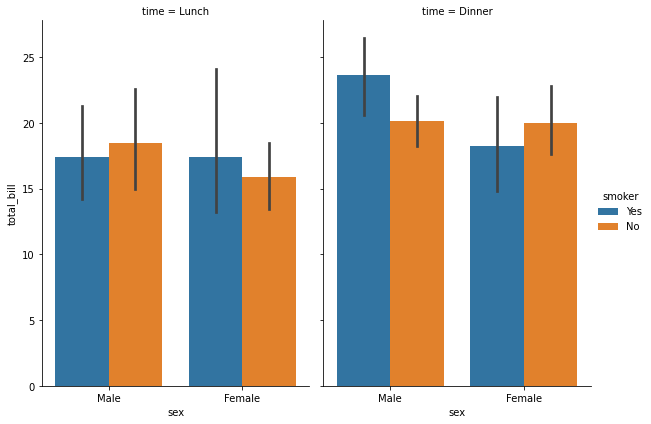

In [ ]:
# Use catplot() to combine a barplot() and a FacetGrid. This allows grouping within additional categorical variables. Using catplot() is safer than using FacetGrid directly, as it ensures synchronization of variable order across facets:

sns.catplot(x="sex", y="total_bill",hue="smoker", col="time",data=tips, kind="bar",height=6, aspect=.7)

In [ ]:
# histogram

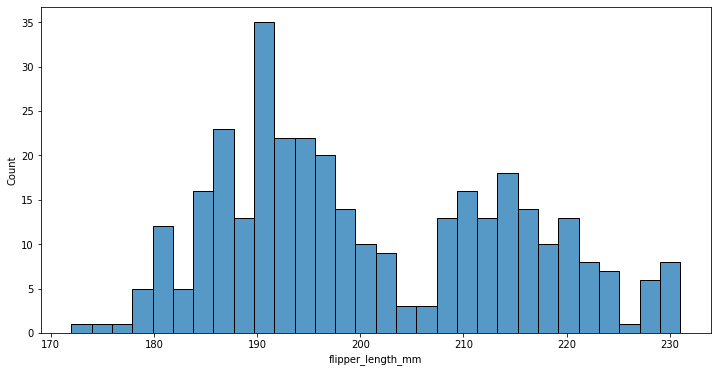

In [ ]:
penguins = sns.load_dataset("penguins")
f, ax = plt.subplots(figsize=(12, 6))
sns.histplot(data=penguins, x="flipper_length_mm", bins=30)

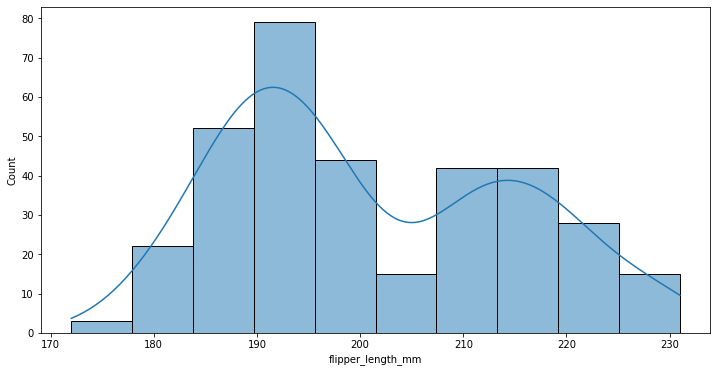

In [ ]:
# Add a kernel density estimate to smooth the histogram, providing complementary information about the shape of the distribution:
f, ax = plt.subplots(figsize=(12, 6))
sns.histplot(data=penguins, x="flipper_length_mm", kde=True)

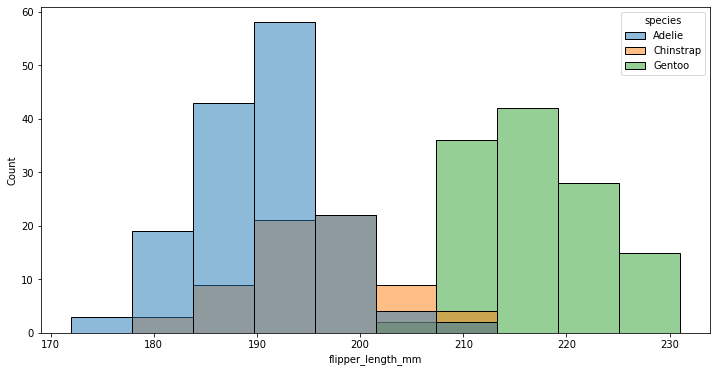

In [ ]:
f, ax = plt.subplots(figsize=(12, 6))
sns.histplot(data=penguins, x="flipper_length_mm", hue="species")

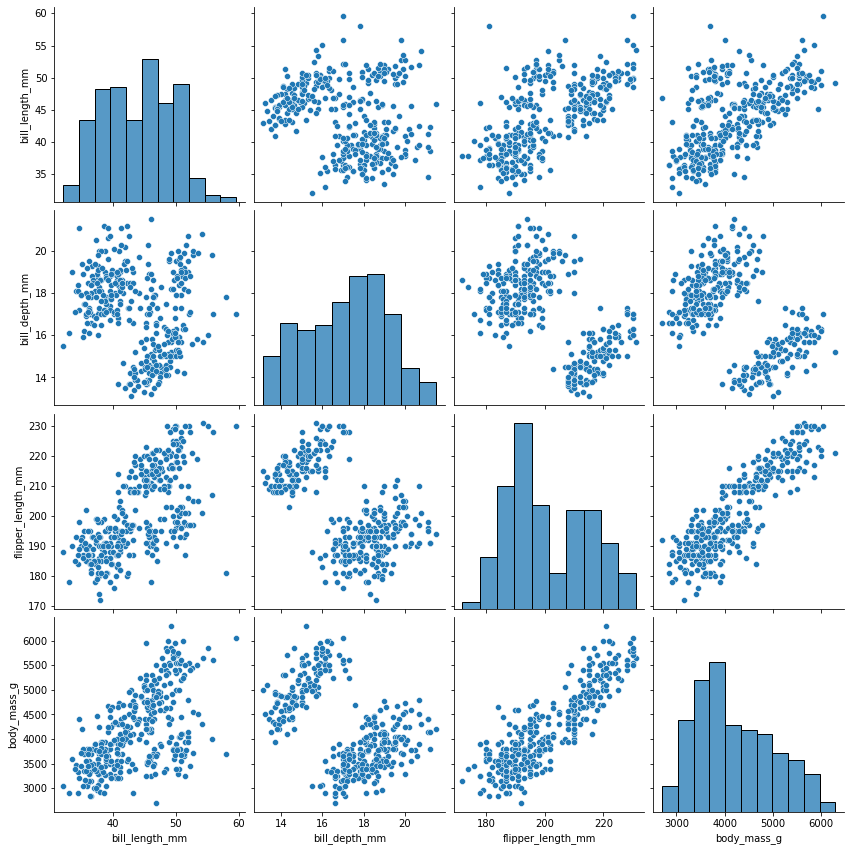

In [ ]:
sns.pairplot(penguins,height=3)

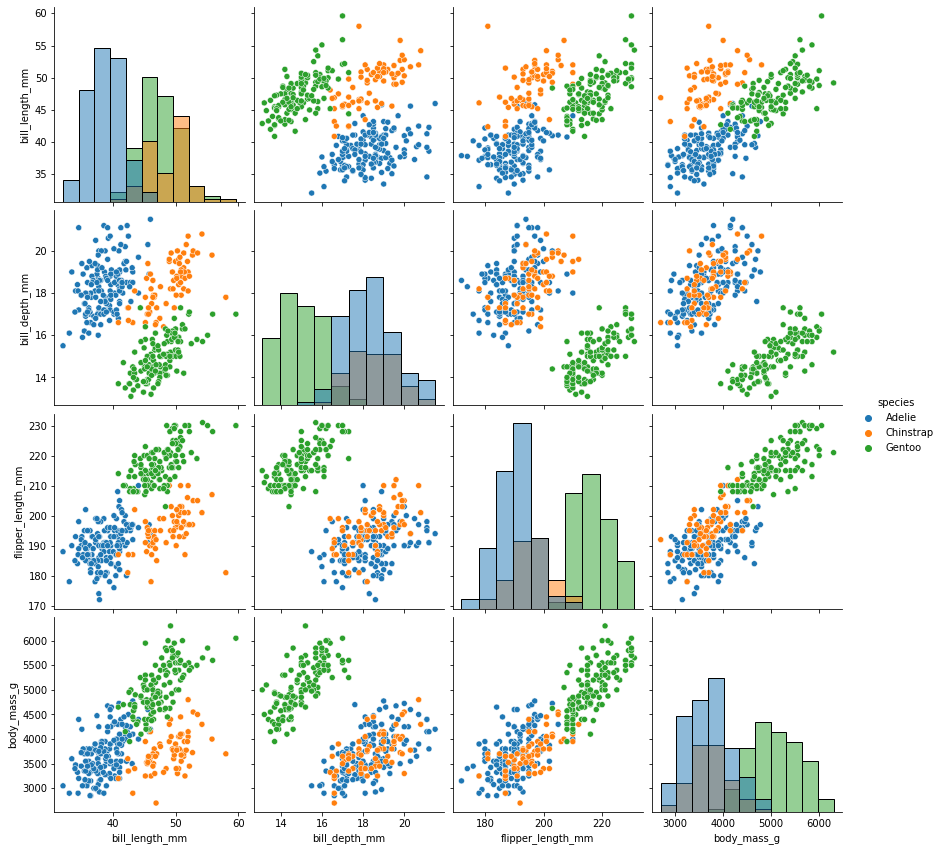

In [ ]:
sns.pairplot(penguins, hue="species", diag_kind="hist",height=3)

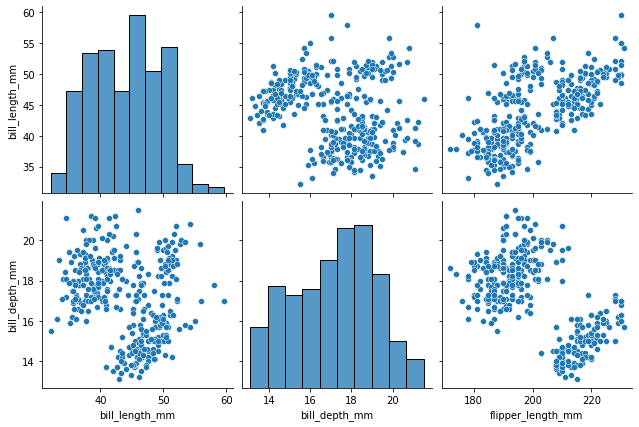

In [ ]:
sns.pairplot(
    penguins,
    x_vars=["bill_length_mm", "bill_depth_mm", "flipper_length_mm"],
    y_vars=["bill_length_mm", "bill_depth_mm"],
    height=3
)

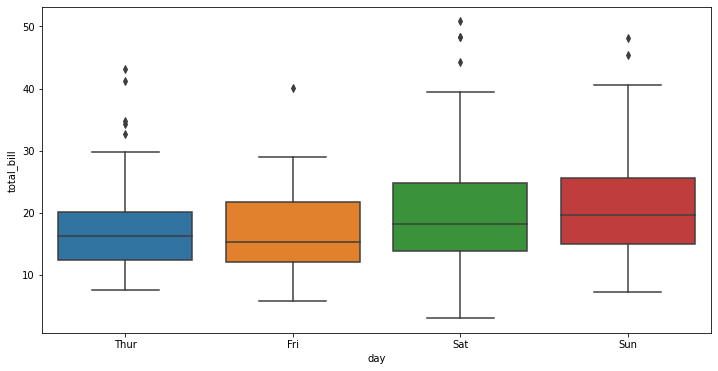

In [ ]:
f, ax = plt.subplots(figsize=(12, 6))
ax = sns.boxplot(x="day", y="total_bill", data=tips)

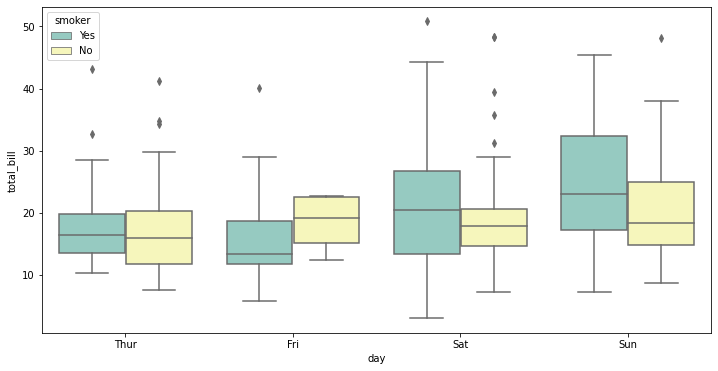

In [ ]:
f, ax = plt.subplots(figsize=(12, 6))
ax = sns.boxplot(x="day", y="total_bill", hue="smoker",
                 data=tips, palette="Set3")